# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import glob
import copy
import numpy as np
import scipy.misc as scpm
%matplotlib inline

In [2]:
modelar = pd.read_csv('data/Modelar_UH2019.txt', sep="|")
estimar = pd.read_csv('data/Estimar_UH2019.txt', sep="|")

print('Modelar:', modelar.shape, 'Estimar:', estimar.shape)

Modelar: (9958, 53) Estimar: (1104, 52)


In [3]:
modelar.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,5.09,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,4.08,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,4.43,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,5.03,863.17,168.0,50.74,92,15.82,14.55,2,47,108.27
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,5.03,863.17,168.0,50.74,3,0.00,0.00,2,39,7.50


In [4]:
width, height= 60,60
def load_images(filenames):
    images =np.asarray([cv2.resize(scpm.imread(file, mode= 'RGB'),(width,height)) for file in filenames])
    return images

In [5]:
width, height= 60,60

def load_images2(path):
    filenames= sorted(glob.glob(path))[0:10]
    images =np.asarray([cv2.resize(scpm.imread(file, mode= 'RGB'),(width,height)) for file in filenames])
    return images

In [6]:
names = sorted(glob.glob('imagenes_inmuebles_haya/*.jpg'))


In [7]:
images=load_images2('imagenes_inmuebles_haya/*.jpg')

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [8]:
images[0].shape

(60, 60, 3)

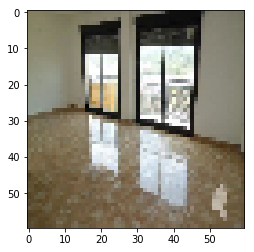

In [9]:
plt.imshow(images[8])

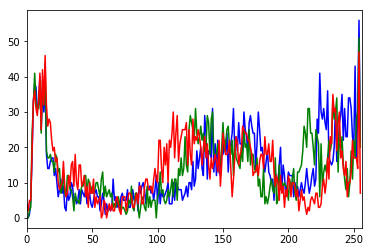

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([images[0]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [11]:
modelar[['HY_id','TARGET']].head()

,HY_id,TARGET
0,6028499,32.16
1,6028500,30.71
2,6028502,63.48
3,6028512,108.27
4,6028513,7.50


In [14]:
lista=[]
for i in range(len(names)):
    lista.append(names[i][24:31])
    
df= pd.DataFrame(lista,columns=['HY_id'])
df['HY_id']=df['HY_id'].astype(int)
df=df.set_index('HY_id')
df.head()

df2=modelar[['HY_id','TARGET']]
df2=df2.set_index('HY_id')
df2.head()

,TARGET
HY_id,
6028499,32.16
6028500,30.71
6028502,63.48
6028512,108.27
6028513,7.50


In [15]:
result=pd.merge(df, df2, how='left', on='HY_id')
result.head(10)

,TARGET
HY_id,
6028499,32.16
6028499,32.16
6028499,32.16
6028499,32.16
6028499,32.16
6028500,30.71
6028500,30.71
6028500,30.71
6028502,63.48


In [16]:
import math 

y=result['TARGET'].as_matrix()
print('Total:',len(y),len(names))

predict_X_names=[]
tt_X_names=[]
tt_Y=[]

for i in range(len(y)):
    if math.isnan(y[i]):
        predict_X_names.append(names[i])
    else:
        if y[i]<300:
            tt_X_names.append(names[i])
            tt_Y.append(y[i])
print('\n','For training/test:',len(tt_X_names))
print(' For predicting:',len(predict_X_names))
print(' Discarded:',len(y)-len(tt_Y)-len(predict_X_names))


Total: 47381 47381

 For training/test: 42137
 For predicting: 4745
 Discarded: 499


C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
print(len(predict_X_names),len(tt_X_names),len(tt_Y))


4745 42137 42137


In [ ]:
train_X=load_images(tt_X_names)

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [227]:
train_Y=tt_Y

In [240]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size    = 128
epochs        = 100
iterations    = 391
num_classes   = 10
dropout       = 0.5
weight_decay  = 0.0001


from keras import backend as K
if('tensorflow' == K.backend()):
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)


weight_decay  = 0.0001

model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=(60,60,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Activation('softmax'))

model.load_weights('cifar10vgg.h5',by_name=True)

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mean_squared_error',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 60, 60, 64)        1792      
_________________________________________________________________
activation_151 (Activation)  (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_141 (Bat (None, 60, 60, 64)        256       
_________________________________________________________________
dropout_101 (Dropout)        (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 60, 60, 64)        36928     
_________________________________________________________________
activation_152 (Activation)  (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_142 (Bat (None, 60, 60, 64)        256       
__________

In [201]:
def train(nnmodel, batch, epochs, train_XY, validation_XY, test_XY):
    
    start = time.time()
    history = nnmodel.fit(train_XY[0], train_XY[1], batch_size=batch, epochs=epochs, verbose=1, validation_data=validation_XY)
    end = time.time()

    loss, acc = nnmodel.evaluate(test_XY[0], test_XY[1], verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', acc)

    plot_model_history(history)
    print("Training MLP took " + str(end - start) + " seconds")

In [232]:
from sklearn.model_selection import train_test_split

t_X, val_X, t_y, val_y = train_test_split(train_X,train_Y,train_size=0.70, random_state=0)

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [241]:
import time
train(model,100,20,(t_X,t_y),(val_X,val_y),(val_X,val_y))

Train on 29495 samples, validate on 12642 samples
Epoch 1/20


InternalError: GPU sync failed

In [229]:
rounded_ty=[round(i) for i in t_y]

(array([5.140e+02, 3.000e+02, 4.310e+02, 4.760e+02, 4.760e+02, 4.050e+02,
        5.490e+02, 4.440e+02, 5.910e+02, 6.390e+02, 7.650e+02, 7.400e+02,
        9.420e+02, 7.440e+02, 9.870e+02, 9.860e+02, 9.930e+02, 1.021e+03,
        1.049e+03, 1.125e+03, 1.065e+03, 1.108e+03, 9.280e+02, 9.000e+02,
        8.190e+02, 7.560e+02, 7.050e+02, 5.870e+02, 6.110e+02, 6.130e+02,
        5.610e+02, 4.820e+02, 5.380e+02, 4.300e+02, 3.410e+02, 3.490e+02,
        3.300e+02, 2.920e+02, 2.740e+02, 2.360e+02, 2.170e+02, 1.600e+02,
        2.220e+02, 2.170e+02, 1.540e+02, 1.550e+02, 1.430e+02, 1.350e+02,
        1.650e+02, 8.600e+01, 1.620e+02, 6.200e+01, 1.410e+02, 5.300e+01,
        8.300e+01, 8.500e+01, 8.800e+01, 3.700e+01, 5.000e+01, 9.800e+01,
        4.000e+01, 3.300e+01, 7.000e+01, 6.700e+01, 6.100e+01, 2.400e+01,
        3.700e+01, 3.400e+01, 2.000e+01, 1.600e+01, 2.500e+01, 1.000e+01,
        2.000e+01, 4.700e+01, 1.400e+01, 2.600e+01, 1.600e+01, 3.500e+01,
        3.200e+01, 2.900e+01, 1.900e+0

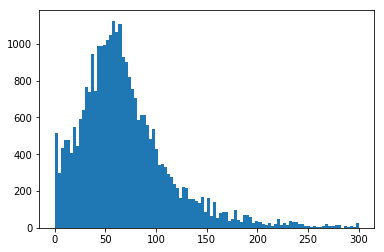

In [230]:
plt.hist(rounded_ty,bins=100)